# Load Packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load Data Points (Do not modify the following block)

We have 15 number of data
Coefficients of the original polynomial
w0:-0.467  w1:-0.005  w2:0.281  w3:-0.054  


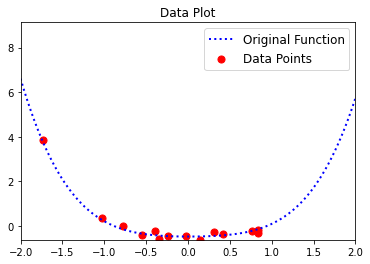

In [2]:
with open('training_data.npz', 'rb') as f:
    data = np.load(f)

    x_list = data['x_list']
    y_list = data['y_list']

    x_data = data['x_data']
    y_data = data['y_data']
    n_data = len(x_data)
    
    w = data['w']
    original_degree = data['order']
    
# Print information of original function.
print("=================================")
print("We have", n_data, "number of data")

print("=================================")
weight_info_string = ''
for d in range(original_degree):
    weight_info_string += 'w'+str(d)+':'+str(round(w[d],ndigits=3))+'  '
print("Coefficients of the original polynomial")
print(weight_info_string)
print("=================================")
    
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

# Polynomial Regression (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'w' is true coefficients of the original polynomial function
- 'original_degree' is the order of the original polynomial function
- 'x_list' is a list of the points at $x$-axis
- 'y_list' is a list of function value $f(x)$ corresponding to 'x_list'. In other words, y_list = $f($x_list$)$
- 'x_data' is an input data
- 'y_data' is an output data
- 'n_data' is the number of data points

### Our goal is to estimate 'w' from data points, 'x_data' and 'y_data'. Answer the following problems.

### 1. Compute a Vandermonde matrix when the degree of polynomial is $4$ (30pt)
- The variable 'degree' is the order of polynomial. In this problem, we set degree=$4$
- Use the variable 'A' for the Vandermonde matrix. Now, 'A' is initialized as a zero matrix whose elements are all zero. Fill in the element of the Vandermonde matrix by using power operator (\*\*), for loop, and np.concatenation.

In [3]:
degree = 4
A = np.zeros((n_data,degree+1)) # Dummy initialization
np.set_printoptions(precision=8,suppress=True)

def vander_with_deg(lst,sav,dg):
    for i in range(np.shape(lst)[0]):
        mi=[1*lst[i]**j for j in range(dg+1)]
        sav[i]= mi

vander_with_deg(x_data,A,degree)
      

### Print results (do not modify the following block)

In [4]:
print(A)

[[  1.           0.76945826   0.59206601   0.45557008   0.35054216]
 [  1.          -0.54872683   0.30110113  -0.16522227   0.09066189]
 [  1.          -0.39608899   0.15688649  -0.06214101   0.02461337]
 [  1.          -0.34445736   0.11865087  -0.04087017   0.01407803]
 [  1.          -1.73259726   3.00189326  -5.20107204   9.01136317]
 [  1.          -1.02635747   1.05340965  -1.08117486   1.10967189]
 [  1.           0.83183273   0.6919457    0.57558308   0.47878885]
 [  1.           0.41809573   0.17480404   0.07308482   0.03055645]
 [  1.          -0.7734509    0.59822629  -0.46269866   0.35787469]
 [  1.           0.1413883    0.01999065   0.00282644   0.00039963]
 [  1.           0.31661487   0.10024498   0.03173905   0.01004906]
 [  1.           0.8320897    0.69237328   0.57611667   0.47938075]
 [  1.          -0.02034966   0.00041411  -0.00000843   0.00000017]
 [  1.          -0.24342833   0.05925735  -0.01442492   0.00351143]
 [  1.          -2.17955166   4.75044544 -10.353

### 2. Compute the coefficients of polynomial regression using a $4$ degree polynomial  (40pt)
- Use the variable 'degree' and the Vandermonde matrix 'A' in Problem 1.
- The variable 'w_est' is the coefficients of polynomial regression. Now, 'w_est' is initialized as a zero vector. Compute the 'w_est' from 'A' and 'y'
- The variable 'y_est' is an estimated function value corresponding to the input points 'x_list'. Now, it is a zero list and fill the list by computing the estimated function values. In other words, y_est = $\hat{f}($x_list$)$

In [5]:
degree = 4
w_es = np.linalg.pinv(A).dot(y_data)
w_est = w_es.reshape(degree+1,1)
for i in range(1,degree+1):
    y_est = w_est[i]*x_list**i + w_est[0] 

### Print results (do not modify the following block)

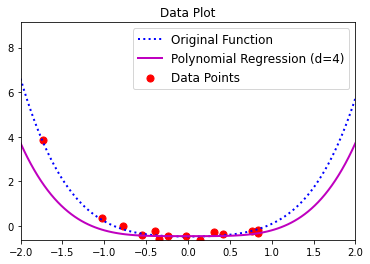

In [6]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(degree))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 3. Compute the polynomial regression with $1$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $1$.
- Use the following variables.
> degree1, A1, w_est1, y_est1

In [7]:
degree1 = 1
A1 = np.zeros((n_data, degree1+1)) 
vander_with_deg(x_data,A1,degree1)
w_es1 = np.linalg.pinv(A1).dot(y_data)
w_est1 = w_es1.reshape(degree1+1,1)
for i in range(1,degree1+1):
    y_est1 = w_est1[i]*x_list**i + w_est1[0] 

### Print results (do not modify the following block)

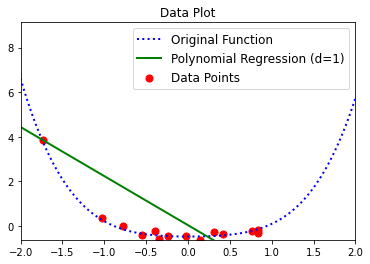

In [8]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(degree1))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 4. Compute the polynomial regression with $10$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $10$.
- Use the following variables.
> degree2, A2, w_est2, y_est2

In [9]:
degree2 = 10
A2 = np.zeros((n_data, degree2+1))
vander_with_deg(x_data,A2,degree2)
w_es2 = np.linalg.pinv(A2).dot(y_data)
w_est2 = w_es2.reshape(degree2+1,1)
for i in range(1,degree2+1):
    y_est2 = w_est2[i]*x_list**i + w_est2[0] 

### Print results (do not modify the following block)

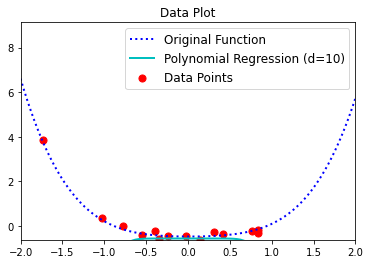

In [10]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(degree2))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 5. [Challenging Problem] Explain the effect of degree (20pt)
- By solving the above problems, we can observe the behaviors of polynomial regression with different degrees (1, 4, 10)
- Explain pros and cons of high degree polynomial
- Explain pros and cons of low degree polynomial
- What is this phenomenon called in machine learning?

### The following figure shows all regression results with different degrees.

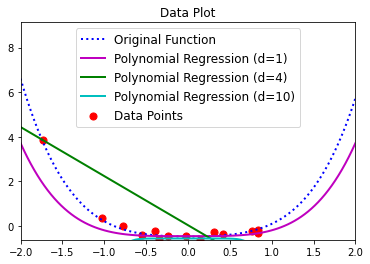

In [11]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(1))
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(4))
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(10))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

Write your answer!!!

my answer: 
High degree polynomial is highly accurate because it can derive functions suitable for training data.
But it slow down the model, and as the degree increases, the data is overlearned and not generalized.
This phenomenon is called overfitting.
Low degree polynomial is easy to interpret and infer, and can be used consistently and simply 
in optimization or detection, having a powerful advantage to time complexity and demension. But
low degree polynomial poorly captures dependencies between data in complex data.
This phenomenon is called underfitting.